In [1]:
import numpy as onp
import jax.numpy as jnp
import matplotlib.pyplot as plt
from scipy.stats import linregress
import time

In [2]:
n = 100  # Foreground sample size
m = 100  # Background sample size
p = 1000    # Number of features
d = 2    # Latent dimension

zx = onp.random.normal(size=(n, d))    # Foreground shared latent variables
zy = onp.random.normal(size=(m, d))    # Background shared latent variables
t = onp.random.normal(size=(n, d))     # Foreground-specific latent variables
W = onp.random.normal(size=(d, p))     # Foreground-specific loadings matrix
S = onp.random.normal(size=(d, p))     # Shared loadings matrix
beta = onp.random.normal(size=(d, 1))  # Coefficient vector

# W = [[-10.123,5.543]]     # Foreground-specific loadings matrix
# S = [[1.908,2.67]]    # Shared loadings matrix
# beta = [[1.103]]   # Coefficient vector
sigma = 2e-2                           # Data matrix noise variance
tau = 5e-1                             # Response noise variance

print('==S==')
print(S)
print('==W==')
print(W)
print('==beta==')
print(beta)

# Foreground data
X = zx @ S + t @ W + onp.random.normal(scale=sigma, size=(n, p))
print(type(X))
print(X.shape)

# Background data
Y = zy @ S + onp.random.normal(scale=sigma, size=(m, p))
print(type(Y))
print(Y.shape)

# Response
R = t @ beta + onp.random.normal(scale=tau, size=(n, 1))
print(type(R))
print(R)

==S==
[[-0.19726117 -1.69320821  0.21429012 ... -0.18834615  0.03971138
   0.02042687]
 [-0.1188857  -1.17083326  0.34056713 ... -1.13400708  0.6239754
   0.10218009]]
==W==
[[ 1.11438543 -0.03825979 -1.10526274 ...  0.54914862 -0.10092726
  -0.40104011]
 [-0.82152531 -0.03192647 -0.57513047 ... -1.16768352  0.20173557
   1.1139276 ]]
==beta==
[[1.14875486]
 [0.13212529]]
<class 'numpy.ndarray'>
(100, 1000)
<class 'numpy.ndarray'>
(100, 1000)
<class 'numpy.ndarray'>
[[-0.46522567]
 [-1.22937115]
 [-2.42962106]
 [-0.05117077]
 [-0.86478652]
 [ 0.85540682]
 [-1.56513991]
 [ 0.74087347]
 [ 0.04993232]
 [-0.89022236]
 [-0.0031256 ]
 [-0.02365471]
 [ 0.63186389]
 [ 2.49552007]
 [ 1.59134702]
 [-0.44026862]
 [ 0.23923577]
 [ 1.8044463 ]
 [ 0.47148896]
 [-1.79623884]
 [ 0.42945439]
 [-1.41174432]
 [ 0.12014113]
 [-1.2400602 ]
 [-2.03115511]
 [-0.85960546]
 [-1.82166896]
 [ 1.74937769]
 [ 0.59948309]
 [-0.9785282 ]
 [ 1.0472823 ]
 [-0.32600627]
 [ 1.82750922]
 [-2.30705537]
 [ 2.20679995]
 [-1

In [3]:
import sys

sys.path.append("../contrastive-regression/models")
from linear_cr import LinearCR
start = time.time()
# Instantiate model
model = LinearCR()

# Fit model
model.fit(X, Y, R, d,learning_rate=1e-3)

# Make predictions on training data
preds = model.predict(X)
end = time.time()

2022-11-14 13:42:37.760060: E external/org_tensorflow/tensorflow/compiler/xla/service/slow_operation_alarm.cc:65] Constant folding an instruction is taking > 1s:

  dot.16 (displaying the full instruction incurs a runtime overhead. Raise your logging level to 4 or above).

This isn't necessarily a bug; constant-folding is inherently a trade-off between compilation time and speed at runtime.  XLA has some guards that attempt to keep constant folding from taking too long, but fundamentally you'll always be able to come up with an input program that takes a long time.

If you'd like to file a bug, run with envvar XLA_FLAGS=--xla_dump_to=/tmp/foo and attach the results.
2022-11-14 13:42:38.119645: E external/org_tensorflow/tensorflow/compiler/xla/service/slow_operation_alarm.cc:133] The operation took 1.359855s
Constant folding an instruction is taking > 1s:

  dot.16 (displaying the full instruction incurs a runtime overhead. Raise your logging level to 4 or above).

This isn't necessaril

Step: 0               Log marginal lik.: -340882.06
Step: 200             Log marginal lik.: -48542.11
Step: 400             Log marginal lik.: -7049.6
Step: 600             Log marginal lik.: 17666.16
Step: 800             Log marginal lik.: 40107.98
Step: 1000            Log marginal lik.: 61644.77
Step: 1200            Log marginal lik.: 82703.6
Step: 1400            Log marginal lik.: 103472.52
Step: 1600            Log marginal lik.: 124048.58
Step: 1800            Log marginal lik.: 144486.91
Step: 2000            Log marginal lik.: 164820.81
Step: 2200            Log marginal lik.: 185071.25
Step: 2400            Log marginal lik.: 205251.83
Step: 2600            Log marginal lik.: 225369.56
Step: 2800            Log marginal lik.: 245428.56
Step: 3000            Log marginal lik.: 265430.53
Step: 3200            Log marginal lik.: 285373.22
Step: 3400            Log marginal lik.: 305253.19
Step: 3600            Log marginal lik.: 325063.81
Step: 3800            Log marginal li

In [4]:
# runtime
print(end - start)

1193.3458278179169


In [5]:
print('==S==')
print(model.S)
print('==W==')
print(model.W)
print('==beta==')
print(model.beta)
print('==sigma_sq==')
print(model.sigma_sq)
print('==tau_sq==')
print(model.tau_sq)
print('==preds==')
print(preds)

==S==
[[-0.05514435 -0.40514728 -0.01755774 ...  0.3200941  -0.20668942
  -0.02709565]
 [ 0.12379269  1.1390636  -0.24094732 ...  0.6227569  -0.32181934
  -0.05707942]]
==W==
[[ 0.1259903   0.08221516 -0.70202446 ... -0.19574171  0.01107084
   0.28566328]
 [-0.80772537  0.0236049   0.28104356 ... -0.63159937  0.09648663
   0.5860405 ]]
==beta==
[[ 0.4727161 ]
 [-0.48916787]]
==sigma_sq==
[0.00047107]
==tau_sq==
[0.21068984]
==preds==
[-0.50158864 -0.9963995  -2.2404726   0.17822146 -0.49810457  1.2148237
 -1.2785083   1.5859905   0.48700288 -0.6045491   0.4017331   0.59444517
  1.1003919   2.0426435   1.2414651  -0.5604208   0.28331947  0.6391224
  0.18056075 -1.1886312   0.12188448 -1.1017468   1.1565361  -1.6121168
 -1.2551776  -1.1466593  -2.0052552   1.8700676   0.8931238  -0.0545072
  1.0596837   0.24111597  2.2718744  -1.820538    1.9997015  -1.1975645
  1.2807534   0.9728544  -0.41454142 -0.6732051  -2.4349163   0.05108474
 -1.1005931  -1.7084022   1.0987613  -1.0742766   1.6390

In [6]:
_, _, r2_contrastivereg, _, _ = linregress(R.squeeze(), preds)
print(r2_contrastivereg)

0.9473679241639963


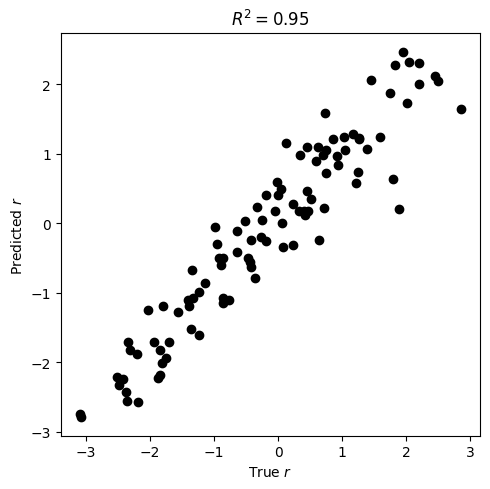

In [7]:
plt.figure(figsize=(5, 5))
plt.subplot()
plt.scatter(R, preds, c="black")
plt.xlabel(r"True $r$")
plt.ylabel(r"Predicted $r$")
plt.title(r"$R^2 = " + str(round(r2_contrastivereg, 2)) + "$")

plt.tight_layout()
plt.show()

In [8]:
# update some code in BZ
import sys

sys.path.append("../contrastive-regression/models")
from linear_cr_bz import LinearCRBZ
newstart = time.time()
# Instantiate model
newmodel = LinearCRBZ()

# Fit model
newmodel.fit(X, Y, R, d)

# Make predictions on training data
newpreds = newmodel.predict(X)
newend = time.time()

Step: 0               Log marginal lik.: -361996.75
Step: 200             Log marginal lik.: 130035.85
Step: 400             Log marginal lik.: 326802.16
Step: 600             Log marginal lik.: 513932.75
Step: 800             Log marginal lik.: 646486.5
Step: 1000            Log marginal lik.: 677781.56
Step: 1200            Log marginal lik.: 678959.94
Step: 1400            Log marginal lik.: 679106.12
Step: 1600            Log marginal lik.: 678906.75
Step: 1800            Log marginal lik.: 679025.25
Step: 2000            Log marginal lik.: 679059.88
Step: 2200            Log marginal lik.: 679256.12


In [9]:
# runtime
print(newend - newstart)

141.9312767982483


In [10]:
print('==S==')
print(newmodel.S)
print('==W==')
print(newmodel.W)
print('==beta==')
print(newmodel.beta)
print('==self.sigma_sq==')
print(newmodel.sigma_sq)
print('==tau_sq==')
print(newmodel.tau_sq)
print('==preds==')
print(newpreds)

==S==
[[-0.10971676 -0.96482307  0.15769476 ... -0.28337812  0.12787968
   0.02622493]
 [-0.01667887 -0.22659437  0.12039162 ... -0.5036084   0.28904286
   0.04426484]]
==W==
[[ 0.6869328   0.06275622 -0.389483   ...  0.53869253 -0.11272269
  -0.423089  ]
 [ 0.0107708  -0.08041029  0.5237472  ...  0.25933483 -0.03068395
  -0.3140862 ]]
==beta==
[[ 0.49213615]
 [-0.31120923]]
==self.sigma_sq==
[0.00039277]
==tau_sq==
[0.2106891]
==preds==
[-0.50159764 -0.9964124  -2.2404847   0.1782251  -0.4981005   1.2148165
 -1.2785149   1.5860157   0.48698545 -0.60455513  0.4017305   0.5944353
  1.1003834   2.0426614   1.2414641  -0.5604254   0.28332478  0.63912773
  0.1805702  -1.1886526   0.12189023 -1.1017557   1.1565341  -1.6121492
 -1.2551972  -1.146661   -2.0052736   1.8700898   0.89314085 -0.0545013
  1.0596879   0.24112356  2.2718742  -1.8205587   1.9997119  -1.197568
  1.2807802   0.9728607  -0.41454035 -0.6732093  -2.4349263   0.0510837
 -1.1005932  -1.7084259   1.0987623  -1.0742713   1.63

In [15]:
# difference
print(abs(newmodel.S) - abs(model.S))
print(abs(newmodel.W) - abs(model.W))
print(abs(newmodel.beta) - abs(model.beta))
print(newmodel.sigma_sq - model.sigma_sq)
print(newmodel.tau_sq - model.tau_sq)
print(max(preds - newpreds))

[[ 5.4572403e-02  5.5967581e-01  1.4013702e-01 ... -3.6715984e-02
  -7.8809738e-02 -8.7072700e-04]
 [-1.0711382e-01 -9.1246921e-01 -1.2055570e-01 ... -1.1914849e-01
  -3.2776475e-02 -1.2814581e-02]]
[[ 0.56094253 -0.01945894 -0.31254146 ...  0.34295082  0.10165184
   0.13742572]
 [-0.7969546   0.05680539  0.24270365 ... -0.37226453 -0.06580268
  -0.2719543 ]]
[[ 0.01942006]
 [-0.17795864]]
[-7.8294106e-05]
[-7.4505806e-07]
3.2424927e-05


In [12]:
_, _, new_r2_contrastivereg, _, _ = linregress(R.squeeze(), newpreds)
print(new_r2_contrastivereg)

0.9473681782798189


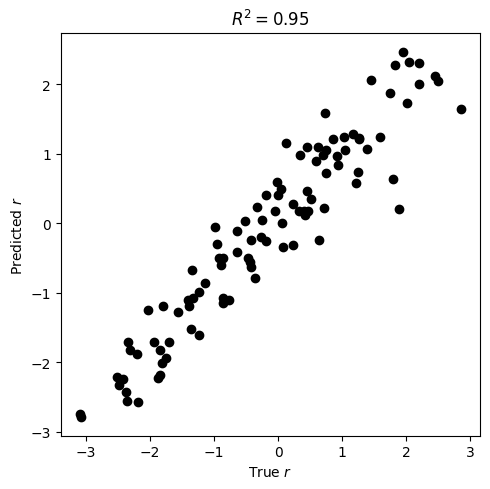

In [13]:
plt.figure(figsize=(5, 5))
plt.subplot()
plt.scatter(R, newpreds, c="black")
plt.xlabel(r"True $r$")
plt.ylabel(r"Predicted $r$")
plt.title(r"$R^2 = " + str(round(new_r2_contrastivereg, 2)) + "$")

plt.tight_layout()
plt.show()